# Salary Predictions Based on Job Descriptions - 99. try and error

In [ ]:
# my info here
__author__ = "Tomo Shimo"
__email__ = "tomo.krmr@gmail.com"

In [168]:
%load_ext pycodestyle_magic
%flake8_on

As [the first notebook](./1-tomokr-EDA.ipynb), the baseline of MSE (Mean Squared Error) is 1288. (Linear model)

In [166]:
# import libraries and modules
import pandas as pd
import sklearn as sk
import numpy as np

#Load the "autoreload" extension so that code can change
%load_ext autoreload
# always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.data import load_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### load data

In [169]:
output_path = '../data/interim/'
df = load_data.load_data(output_path, 'data.csv')

### ---- 6 Hypothesize solution ----

## Model 1: Adding degree and jobtype as variables
I think the degree and jobtype are also the key to predict the salary. It's because the means of salary and degree depend on what they are.

I applied one-hot encoding to "jobType" and "degree".
Then I predict the relationship between salary with variables, which are years of experience, degree and jobtype.

## Model 2: Model1 + salary scaling
At first, scale saraly, then use model 1.
This is because the distribution of salary is skewed.

## Model 3: All the features without companyID
All the features without companyID are considered as linearly correlated with salary.

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

## Model 1

In [42]:
df_model1 = df[['salary','degree','jobType','yearsExperience']]

###  Transform categorical features into one-hot valiables

In [43]:
df_jobType_labels = df_model1[['jobType']]

In [44]:
from sklearn.preprocessing import LabelBinarizer
    
encoder = LabelBinarizer()
df_jobType_1hot = df_model1.join(pd.DataFrame(encoder.fit_transform(df_jobType_labels),
                          columns=encoder.classes_, 
                          index=df.index))


In [45]:
df_jobType_1hot = df_jobType_1hot.drop("jobType", axis=1)

In [46]:
df_degree_labels = df_model1[['degree']]

In [47]:
df_degree_1hot = df_jobType_1hot.join(pd.DataFrame(encoder.fit_transform(df_degree_labels),
                          columns=encoder.classes_, 
                          index=df.index))
df_degree_1hot = df_degree_1hot.drop("degree", axis=1)

In [48]:
target_model1 = df_degree_1hot['salary']
features_model1 = df_degree_1hot.drop("salary", axis=1)

In [49]:
target_model1

0         130
1         101
2         137
3         142
4         163
         ... 
999990     88
999991    160
999992     64
999993    149
999994     88
Name: salary, Length: 999995, dtype: int64

In [50]:
features_model1

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,DOCTORAL,HIGH_SCHOOL,MASTERS,NONE
0,10,0,1,0,0,0,0,0,0,0,0,0,1,0
1,3,1,0,0,0,0,0,0,0,0,0,1,0,0
2,10,0,0,0,0,0,0,0,1,0,1,0,0,0
3,8,0,0,0,0,0,1,0,0,0,1,0,0,0
4,8,0,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,0,0,0,0
999991,12,0,0,1,0,0,0,0,0,0,0,1,0,0
999992,16,0,0,0,0,1,0,0,0,0,0,1,0,0
999993,6,0,1,0,0,0,0,0,0,0,0,0,1,0


## Model 2

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
target_model2 = scaler.fit_transform(df_degree_1hot[['salary']])

In [53]:
target_model2

array([[ 0.35998527],
       [-0.38903692],
       [ 0.54078373],
       ...,
       [-1.34468592],
       [ 0.85072395],
       [-0.72480548]])

In [54]:
target_model2_inv = scaler.inverse_transform(target_model2)
target_model2_inv

array([[130.],
       [101.],
       [137.],
       ...,
       [ 64.],
       [149.],
       [ 88.]])

In [55]:
scaler.mean_

array([116.06239831])

In [56]:
scaler.scale_

array([38.71714403])

In [57]:
target_model2_df = pd.DataFrame(target_model2, index=df.index)
target_model2_df

,0
0,0.359985
1,-0.389037
2,0.540784
3,0.669925
4,1.212321
...,...
999990,-0.724805
999991,1.134836
999992,-1.344686
999993,0.850724


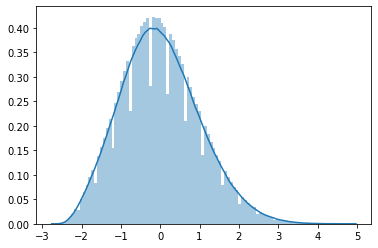

In [58]:
sns.distplot(target_model2_df, 100,"salary", "Distribution of salary")

mean = 0, std_dev = 1.0
=> outlier 1.5*2=3.0

In [59]:
print(len(target_model2[target_model2_df[0] > 3.0]))

3212


In [60]:
scaler.inverse_transform([3.0])

array([232.21383039])

Confirm how much is the mse between standarized one and original one

In [61]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(target_model1, target_model2_inv)
mse_test

9.26796290758549e-31

## Model 3

In [62]:
features_model3 = features_model1.join(df[['milesFromMetropolis']])

### Transform categorical features into one-hot valiables

In [63]:
df_industry_labels = df[['industry']]
df_industry_labels

,industry
0,HEALTH
1,WEB
2,HEALTH
3,AUTO
4,FINANCE
...,...
999990,HEALTH
999991,FINANCE
999992,EDUCATION
999993,HEALTH


In [64]:
encoder3 = LabelBinarizer()
features_model3 = features_model3.join(pd.DataFrame(encoder3.fit_transform(df_industry_labels),
                          columns=encoder3.classes_, 
                          index=df.index))
features_model3

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,...,MASTERS,NONE,milesFromMetropolis,AUTO,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
0,10,0,1,0,0,0,0,0,0,0,...,1,0,83,0,0,0,1,0,0,0
1,3,1,0,0,0,0,0,0,0,0,...,0,0,73,0,0,0,0,0,0,1
2,10,0,0,0,0,0,0,0,1,0,...,0,0,38,0,0,0,1,0,0,0
3,8,0,0,0,0,0,1,0,0,0,...,0,0,17,1,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,1,1,...,0,0,16,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,...,0,0,94,0,0,0,1,0,0,0
999991,12,0,0,1,0,0,0,0,0,0,...,0,0,35,0,0,1,0,0,0,0
999992,16,0,0,0,0,1,0,0,0,0,...,0,0,81,0,1,0,0,0,0,0
999993,6,0,1,0,0,0,0,0,0,0,...,1,0,5,0,0,0,1,0,0,0


In [65]:
df_major_labels = df[['major']]

In [66]:
features_model3 = features_model3.rename(columns={"NONE":"NONE_DEG"})

In [67]:
features_model3 = features_model3.join(pd.DataFrame(encoder3.fit_transform(df_major_labels),
                          columns=encoder3.classes_, 
                          index=df.index))
features_model3

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,...,WEB,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
0,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,8,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
999991,12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
999992,16,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
999993,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Replace the categorical values with order by mean salary

In [68]:
df_model3_rev = df [["major","industry", "jobType","degree",'yearsExperience','milesFromMetropolis']]

In [69]:
df_model3_rev['degree']=df_model3_rev['degree'].map({"NONE":0, "HIGH_SCHOOL":1, "BACHELORS":2, "MASTERS":3, "DOCTORAL":4 })

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
df_model3_rev['jobType']=df_model3_rev['jobType'].map({'JANITOR':0,  'JUNIOR':1, 'SENIOR':2, 'MANAGER':3, 'VICE_PRESIDENT':4, 'CFO':5, 'CTO':6,  'CEO':7 })

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
df_model3_rev['major']=df_model3_rev['major'].map({ 'NONE':0,'LITERATURE':1, 'BIOLOGY':2, 'CHEMISTRY':3, 'PHYSICS':4, 'COMPSCI':5, 'MATH':6, 'BUSINESS':7, 'ENGINEERING':8})

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
df_model3_rev['industry']=df_model3_rev['industry'].map({ 
'EDUCATION':0,
'SERVICE':1,
  'AUTO':2,
'HEALTH':3,
'WEB':4,
 'FINANCE':5,
 'OIL':6})

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
print(df_model3_rev.isna().sum())

major                  0
industry               0
jobType                0
degree                 0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


## For Turning Model 3

### dropping degree=none -> didn't work well

In [71]:
features_model4 = features_model3.drop("NONE_DEG", axis=1)

### categorized companyId by mean salary -> didn't work well

In [ ]:
df_companies_sorted

In [ ]:
sns.distplot(df_companies_sorted['salary'], 20,"salary", "Distribution of salary")

In [ ]:
df_companies_sorted["comp_cat"] = np.ceil(df_companies_sorted["salary"]/0.5)

In [ ]:
df_companies_sorted

In [ ]:
df_companies_sorted["comp_cat"].describe()

In [ ]:
df_companies_sorted["comp_cat"]

In [ ]:
features_model5 = features_model4.join(df["companyId"])
features_model5

In [ ]:
comp_dict = df_companies_sorted[["companyId","comp_cat"]]
comp_dict

In [ ]:
comp_dict = comp_dict.set_index('companyId')

In [ ]:
comp_dict.to_dict()

In [ ]:
companyId_mapped = features_model5["companyId"].map(comp_dict["comp_cat"])
companyId_mapped

In [ ]:
features_model5 = features_model5.rename(columns={"companyId":"companyId_"})
features_model5 = features_model5.join(companyId_mapped)
features_model5 = features_model5.drop("companyId_", axis=1)
features_model5

### replace companyId by its mean salary -> didn't work well

In [ ]:
comp_sal_dict = df_companies_sorted[["companyId","salary"]]
comp_sal_dict

In [ ]:
comp_sal_dict = comp_sal_dict.set_index('companyId')
comp_sal_dict

In [ ]:
comp_sal_dict.to_dict()

In [ ]:
features_model6 = features_model4.join(df["companyId"])
features_model6

In [ ]:
companyId_sal_mapped = features_model6["companyId"].map(comp_sal_dict["salary"])
companyId_sal_mapped

In [ ]:
features_model6 = features_model6.rename(columns={"companyId":"companyId_"})
features_model6 = features_model6.join(companyId_sal_mapped)
features_model6 = features_model6.drop("companyId_", axis=1)
features_model6

### Replace the categorical value to its mean salary

### ---- 8 Create models ----

## Model 1

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(features_model1, target_model1)

In [ ]:
some_data = features_model1.iloc[:5]

In [ ]:
some_labels=target_model1.iloc[:5]

In [ ]:
print("Predictions:\t",lin_reg.predict(some_data))

In [ ]:
print("Labels:\t\t",list(some_labels))

In [ ]:

model1_predictions = lin_reg.predict(features_model1)
lin_mse = mean_squared_error(target_model1, model1_predictions)
lin_mse

## Model 2

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(features_model1, target_model2)

In [ ]:
model2_predictions = lin_reg2.predict(features_model1)
model2_predictions_inv = scaler.inverse_transform(model2_predictions)
lin_mse2 = mean_squared_error(target_model1, model2_predictions_inv)
lin_mse2

In [ ]:
model2_predictions

In [ ]:
model2_predictions_inv 

## Model 3

In [73]:
lin_reg3 = LinearRegression()
lin_reg3.fit(features_model3, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
model3_predictions = lin_reg3.predict(features_model3)
lin_mse3 = mean_squared_error(target_model1, model3_predictions)
lin_mse3

384.38026432578107

The MSE of model 3 is now 384. This is the best score.

In [74]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(target_model1, model3_predictions)
mae

15.843779757568374

In [75]:
np.sqrt(lin_mse3)/mae

1.237433143018397

In [95]:
features_model3["MFM_buc"] = features_model3["milesFromMetropolis"] // 20

In [101]:
features_model3[["milesFromMetropolis","MFM_buc"]].head()

,milesFromMetropolis,MFM_buc
0,83,4
1,73,3
2,38,1
3,17,0
4,16,0


In [96]:
features_model3_1 = features_model3.drop("milesFromMetropolis", axis=1)
lin_reg3_1 = LinearRegression()
lin_reg3_1.fit(features_model3_1, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
model3_1_predictions = lin_reg3_1.predict(features_model3_1)
lin_mse3_1 = mean_squared_error(target_model1, model3_1_predictions)
lin_mse3_1

389.5912504980699

## For Tuning Model 3

In [ ]:
lin_reg4 = LinearRegression()
lin_reg4.fit(features_model4, target_model1)

In [ ]:
model4_predictions = lin_reg4.predict(features_model4)
lin_mse4 = mean_squared_error(target_model1, model4_predictions)
lin_mse4

In [ ]:
lin_reg5 = LinearRegression()
lin_reg5.fit(features_model5, target_model1)

In [ ]:
model5_predictions = lin_reg5.predict(features_model5)
lin_mse5 = mean_squared_error(target_model1, model5_predictions)
lin_mse5

In [ ]:
lin_reg6 = LinearRegression()
lin_reg6.fit(features_model6, target_model1)

In [ ]:
model6_predictions = lin_reg6.predict(features_model6)
lin_mse6 = mean_squared_error(target_model1, model6_predictions)
lin_mse6

In [ ]:
lin_reg8 = LinearRegression()
lin_reg8.fit(features_model8, target_model1)

In [ ]:
model8_predictions = lin_reg8.predict(features_model8)
lin_mse8 = mean_squared_error(target_model1, model8_predictions)
lin_mse8

In [78]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(features_model3, target_model1)
en_predictions = elastic_net.predict(features_model3)

In [79]:
en_mse = mean_squared_error(target_model1, en_predictions)
en_mse

434.43596425995804

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_model3_scaled = scaler.fit_transform(features_model3)

In [83]:
lin_reg8 = LinearRegression()
lin_reg8.fit(features_model3_scaled, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
model8_predictions = lin_reg8.predict(features_model3_scaled)
lin_mse8 = mean_squared_error(target_model1, model8_predictions)
lin_mse8

384.380541447852

In [75]:
model3_predictions_sort = sorted(model3_predictions)
model3_predictions_sort

[8.608448028564453,
 8.608448028564453,
 8.608448028564453,
 9.007976531982422,
 9.007976531982422,
 9.007976531982422,
 9.007976531982422,
 9.407503128051758,
 9.407503128051758,
 9.807031631469727,
 9.807031631469727,
 9.807031631469727,
 9.807031631469727,
 9.807031631469727,
 10.206560134887695,
 10.206560134887695,
 10.206560134887695,
 10.206560134887695,
 10.606088638305664,
 10.606088638305664,
 10.618515014648438,
 10.618515014648438,
 10.618515014648438,
 10.618515014648438,
 10.618515014648438,
 11.005617141723633,
 11.005617141723633,
 11.005617141723633,
 11.005617141723633,
 11.005617141723633,
 11.018043518066406,
 11.018043518066406,
 11.018043518066406,
 11.018043518066406,
 11.018043518066406,
 11.405143737792969,
 11.405143737792969,
 11.405143737792969,
 11.405143737792969,
 11.417570114135742,
 11.417570114135742,
 11.417570114135742,
 11.417570114135742,
 11.417570114135742,
 11.417570114135742,
 11.804672241210938,
 11.804672241210938,
 11.804672241210938,
 11.80

In [76]:
import numpy
sort_index = numpy.argsort(model3_predictions)
target_model1_sorted = []
for i in sort_index:
    target_model1_sorted.append(target_model1)

In [133]:
len(model3_predictions_sort)

999995

In [ ]:
model3_residual =[]
for j in range(len(model3_predictions_sort)):
    model3_residual.append(model3_predictions_sort[j] - target_model1_sorted[j])

In [ ]:
plt.plot(model3_residual)

### Removing outliers -> didn't work well

In [362]:
df_model3_mod = features_model3.join(target_model1)
df_model3_mod = df_model3_mod [df_model3_mod['salary']<232.1]

In [363]:
target_model3_mod = df_model3_mod['salary']
features_model3_mod = df_model3_mod.drop("salary",axis=1)

In [369]:
features_model3_mod

,yearsExperience,CEO,CFO,CTO,JANITOR,JUNIOR,MANAGER,SENIOR,VICE_PRESIDENT,BACHELORS,...,WEB,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,NONE,PHYSICS
0,10,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,8,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,19,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
999991,12,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
999992,16,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
999993,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [401]:
lin_reg7 = LinearRegression()
lin_reg7.fit(features_model3_mod, target_model3_mod)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [403]:
model7_predictions = lin_reg7.predict(features_model3)
lin_mse7 = mean_squared_error(target_model1, model7_predictions)
lin_mse7

384.6223952427876

In [443]:
lin_reg9= LinearRegression()
lin_reg9.fit(df_model3_rev, target_model1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [445]:
model9_predictions = lin_reg9.predict(df_model3_rev)
lin_mse9 = mean_squared_error(target_model1, model9_predictions)
lin_mse9

397.0924202873576

## Random Forest

In [323]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(features_model3, target_model1)
predictions_model3_random = forest_reg.predict(features_model3)
forest_mse = mean_squared_error(target_model1, predictions_model3_random)

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [324]:
forest_mse

134.95122092262267

In [375]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(forest_mse)

Scores: 134.95122092262267
Mean: 134.95122092262267
Standard deviation: 0.0


### Stochastic Gradient Descent

In [87]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None ,eta0=0.1)
sgd_reg.fit(features_model3_scaled,target_model1)

/Users/tomokrmr/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [89]:
predictions_model3_sgd = sgd_reg.predict(features_model3_scaled)
sgd_mse = mean_squared_error(target_model1, predictions_model3_sgd)
sgd_mse

389.4430739941548

## SVR

In [90]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(features_model3_scaled,target_model1)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [93]:
predictions_model3_svr = svm_reg.predict(features_model3_scaled)
svr_mse = mean_squared_error(target_model1, predictions_model3_svr)
svr_mse

385.5129823946531

### ---- 9 Test models ----

In [1]:
#do 5-fold cross validation on models and measure MSE

In [405]:
Rcross3 = sk.model_selection.cross_val_score(lin_reg3,features_model3,target_model1, cv=5,scoring='neg_mean_squared_error')
Rcross3

array([-386.30917173, -385.19183317, -385.99246987, -382.57079642,
       -382.00745833])

In [372]:
display_scores(Rcross3)

Scores: [0.74292573 0.74358062 0.74314533 0.74396891 0.74415407]
Mean: 0.7435549329385215
Standard deviation: 0.0004679036282042437


In [327]:
Rcross3_random = sk.model_selection.cross_val_score(forest_reg,features_model3,target_model1, cv=5)
Rcross3_random

array([0.68816648, 0.68870888, 0.68820546, 0.68795427, 0.68855794])

In [ ]:
Rcross3_random_mse = sk.model_selection.cross_val_score(forest_reg,features_model3,target_model1, cv=5,scoring='neg_mean_squared_error')
Rcross3_random_mse

In [373]:
display_scores(Rcross3_random)

Scores: [0.68816648 0.68870888 0.68820546 0.68795427 0.68855794]
Mean: 0.68831860765828
Standard deviation: 0.0002750546056104389


In [368]:
Rcross7 = sk.model_selection.cross_val_score(lin_reg7,features_model3,target_model1, cv=5)
Rcross7

array([0.74292573, 0.74358062, 0.74314533, 0.74396891, 0.74415407])

In [226]:
# Caluculate MSE
y_hat_model3=lin_reg3.predict(features_model3)

sk.metrics.mean_squared_error(y_hat_model3,target_model1)

384.38026432578107

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data